<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/main/scikit_test_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import os
import random
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
#uncomment to pull data that's already been tagged train/test/val

# # pull train and test data from the folder
# root = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/'
# folder = '5_frames_stim1/'
# f_names = os.listdir(root + folder)

# cols = pd.read_csv(root + folder + f_names[0]).columns

# df_train = pd.DataFrame(columns=cols)
# df_test = pd.DataFrame(columns=cols)
# df_val = pd.DataFrame(columns=cols)

# for f in f_names:
#   df = pd.read_csv(root + folder + f)
#   if 'train' in f.split('_')[-1]:
#     df_train = pd.concat([df_train, df])
#   if 'test' in f.split('_')[-1]:
#     df_test = pd.concat([df_test, df])
#   if 'val' in f.split('_')[-1]:
#     df_val = pd.concat([df_val, df])

In [3]:
# pull all data from folder
root = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/'
folder = '5_frames_stim1/'
f_names = os.listdir(root + folder)

paths = [root + folder + f for f in f_names]

df = pd.concat(map(pd.read_csv, paths), ignore_index=True)
df.head()

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,direction_down,...,relation_stim1_NRPS-PRNS,relation_stim1_NRPS-PRPS,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS
0,1,tm4,1,0,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.306057,-0.238462,10.722960,0.115015,0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,1,tm4,1,1,210815_1_1_stackRaw_mc_result_20220308T140826.h5,0.112233,-0.238462,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,7.296311e-21,0.0,0.0,0.0,0.0,0.0
2,1,tm4,1,2,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.400750,-0.238462,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,1,tm4,1,3,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.136589,-0.285537,-157.891452,0.002145,1,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
4,1,tm4,1,4,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.213385,-0.309075,-64.567770,0.001663,0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape # 6 million records

(6157050, 34)

In [7]:
df = df.dropna()
df.shape

(5463042, 34)

In [8]:
#add a unique roi id to the table

#use this to average each movie/roi instead of stack/roi
# df['movie'] = df['filename'].str.slice(0,8)

#use this to group by stack/roi
df['roi_ID'] = df['filename'].astype(str) + '_' + df['roi'].astype(str)
df.head()

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,direction_down,...,relation_stim1_NRPS-PRPS,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS,roi_ID
0,1,tm4,1,0,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.306057,-0.238462,10.722960,0.115015,0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....
1,1,tm4,1,1,210815_1_1_stackRaw_mc_result_20220308T140826.h5,0.112233,-0.238462,0.000000,0.000000,0,...,0.0,0.0,0.0,7.296311e-21,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....
2,1,tm4,1,2,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.400750,-0.238462,0.000000,0.000000,0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....
3,1,tm4,1,3,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.136589,-0.285537,-157.891452,0.002145,1,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....
4,1,tm4,1,4,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.213385,-0.309075,-64.567770,0.001663,0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....


In [9]:
#check the col indices holding the stim1 features
df.columns[18:34]

Index(['relation_stim1_NRNS-NRNS', 'relation_stim1_NRNS-NRPS',
       'relation_stim1_NRNS-PRNS', 'relation_stim1_NRNS-PRPS',
       'relation_stim1_NRPS-NRNS', 'relation_stim1_NRPS-NRPS',
       'relation_stim1_NRPS-PRNS', 'relation_stim1_NRPS-PRPS',
       'relation_stim1_PRNS-NRNS', 'relation_stim1_PRNS-NRPS',
       'relation_stim1_PRNS-PRNS', 'relation_stim1_PRNS-PRPS',
       'relation_stim1_PRPS-NRNS', 'relation_stim1_PRPS-NRPS',
       'relation_stim1_PRPS-PRNS', 'relation_stim1_PRPS-PRPS'],
      dtype='object')

In [10]:
#check the col indices holding the directional features
#right now these are binary
df.columns[9:14]

Index(['direction_down', 'direction_left', 'direction_no_motion',
       'direction_right', 'direction_up'],
      dtype='object')

In [11]:
#scale the raw response

df['resp_scaled'] = df['resp'] /df['resp'].abs().max() #just divide by the max value

#TEMPORARILY distribute the scaled response into the directional columns - probably needs to be more involved than this
directional_cols = [col for col in df.columns if 'direction' in col]


for col in directional_cols:
  df[col] = df['resp_scaled'] * df[col]

df.head()

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,direction_down,...,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS,roi_ID,resp_scaled
0,1,tm4,1,0,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.306057,-0.238462,10.722960,0.115015,-0.000000,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....,-0.025734
1,1,tm4,1,1,210815_1_1_stackRaw_mc_result_20220308T140826.h5,0.112233,-0.238462,0.000000,0.000000,0.000000,...,0.0,0.0,7.296311e-21,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....,0.009437
2,1,tm4,1,2,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.400750,-0.238462,0.000000,0.000000,-0.000000,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....,-0.033696
3,1,tm4,1,3,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.136589,-0.285537,-157.891452,0.002145,-0.011485,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....,-0.011485
4,1,tm4,1,4,210815_1_1_stackRaw_mc_result_20220308T140826.h5,-0.213385,-0.309075,-64.567770,0.001663,-0.000000,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,210815_1_1_stackRaw_mc_result_20220308T140826....,-0.017942


In [12]:
#average each df by roi
df = df.groupby(['roi_ID', 'label']).mean().reset_index()

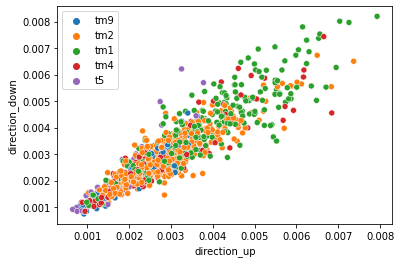

In [13]:
#playing with visualizing the data
#single direction of the stimulus vs the scaled response seems to separate t5 in our 10-frame windowed table
sns.scatterplot(x=df['direction_up'], y=df['direction_down'], hue=df['label'])
plt.legend()

In [14]:
#train test split by roi_ID so that no single roi is included in the training and testing data
#Right now the split is random

#get a list of the unique rois
rois = df.drop_duplicates('roi_ID')[['roi_ID', 'label']]

#treat them like the roi and labels are their own dataset
X = np.array(rois['roi_ID'])
y = np.array(rois['label'])


#split into training and testing - returns the indexes
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0) #40% testing
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

#These are lists of the rois to be included in each split, not the actual data
X_train_rois, X_test_rois = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


TRAIN: [710 126 623 818  74 522 302 895 907 777 760 840 739 414 866 439 288 933
 117 904 757 976  41 129 102 330 359 723 134  81 388 131 608 901 390 389
  48 639 972 427 821 457 402 816 946 222 123 347 695 385 173 797 150 672
 534 407  13 588 690 823 537 557 472 748 719 207 967 653 141 923  11  62
 691 421 540 509 217 955 309  66 448 246 732 223  89 406 916 758 869 858
 782 578 503 225 983 305  86 684 348  39 516 899 717 861 900 425 805 128
 744 387 862  85  18 944 483 224 586 538 567 828 507 620 464 587 556 158
 548  98 353 810 200 582 249 663 171 443 270 764 793 250 148 371 308 495
 618 436 629 689 346 787 352 642 632  27 872 682 451 599 565  71 418 742
 978 754 959 329 456 722 660 960 809 948 236 198 185  97 876 167 264 807
 192 755 860 163 375 204 611 332 383 902 295 119 317 636 362 711 336 741
 344 511  61 290 851 698 865 937 969 767 845 957 631 376 255 831 268 580
 950 562 990 766 528 337 272 315 463 792 839 584   3 574  58 551 880 713
  30 254 752 442 424 658  87 413 202 863  72

In [15]:
#get the column names we want to use as features
data_cols = [col for col in df.columns if 'direction' in col or ('relation_stim1_' in col \
                                                                 and 'future' not in col \
                                                                 and '+5' not in col)]
data_cols

['direction_down',
 'direction_left',
 'direction_no_motion',
 'direction_right',
 'direction_up',
 'relation_stim1_NRNS-NRNS',
 'relation_stim1_NRNS-NRPS',
 'relation_stim1_NRNS-PRNS',
 'relation_stim1_NRNS-PRPS',
 'relation_stim1_NRPS-NRNS',
 'relation_stim1_NRPS-NRPS',
 'relation_stim1_NRPS-PRNS',
 'relation_stim1_NRPS-PRPS',
 'relation_stim1_PRNS-NRNS',
 'relation_stim1_PRNS-NRPS',
 'relation_stim1_PRNS-PRNS',
 'relation_stim1_PRNS-PRPS',
 'relation_stim1_PRPS-NRNS',
 'relation_stim1_PRPS-NRPS',
 'relation_stim1_PRPS-PRNS',
 'relation_stim1_PRPS-PRPS']

In [16]:
def train_test_resample_scale(df, data_cols):
  """
  Function to take in the different df's and return training and testing data
  Useful to try different time windows without tracking a bunch of variables
  """

  #use the roi_id's as indexes to split train and test from our full df
  X_train = df.query('roi_ID in @X_train_rois')[data_cols] 
  y_train = df.query('roi_ID in @X_train_rois')['label'] 

  X_test = df.query('roi_ID in @X_test_rois')[data_cols] 
  y_test = df.query('roi_ID in @X_test_rois')['label']     

  #resample the training set to balance the classes (upsampling the underrepresented classes)
  from imblearn.over_sampling import SMOTE
  smote_nc = SMOTE(random_state=0, k_neighbors = 3)
  X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

  #Scale based on X_train to avoid data leakage
  scaler = StandardScaler() 
  scaler.fit(X_train_resampled)
  X_train_resampled = scaler.transform(X_train_resampled)  
  # apply same transformation to test data
  X_test = scaler.transform(X_test)

  return X_train_resampled, y_train_resampled, X_test, y_test

# try models based on 5-frame stim1 window

In [17]:
#change the df used here to try different time windows
X_train_resampled, y_train_resampled, X_test, y_test = train_test_resample_scale(df, data_cols) 

In [18]:
#multilayer perceptron (neural net)
model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000000, verbose = False, tol = .0000001)
model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000000, tol=1e-07)

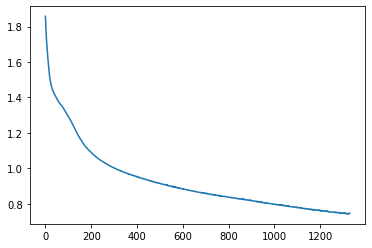

In [19]:
plt.plot(model.loss_curve_) #looks like with more data we would continue improving

In [20]:
#return the predicted classes and probabilities
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)
print(model.classes_)

['t5' 'tm1' 'tm2' 'tm4' 'tm9']


0.44974874371859297
              precision    recall  f1-score   support

          t5       0.31      0.58      0.40        26
         tm1       0.62      0.55      0.58       106
         tm2       0.59      0.51      0.54       184
         tm4       0.16      0.14      0.15        57
         tm9       0.10      0.20      0.14        25

    accuracy                           0.45       398
   macro avg       0.36      0.39      0.36       398
weighted avg       0.49      0.45      0.46       398



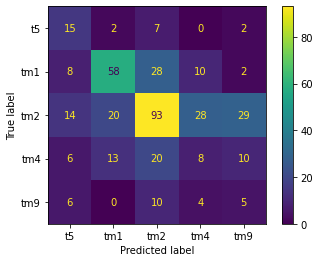

In [21]:
print(model.score(X_test, y_test)) 
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [22]:
#knn
model = KNeighborsClassifier(3)
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

0.41959798994974873
              precision    recall  f1-score   support

          t5       0.22      0.50      0.31        26
         tm1       0.46      0.49      0.47       106
         tm2       0.65      0.42      0.51       184
         tm4       0.24      0.28      0.26        57
         tm9       0.23      0.36      0.28        25

    accuracy                           0.42       398
   macro avg       0.36      0.41      0.37       398
weighted avg       0.49      0.42      0.44       398



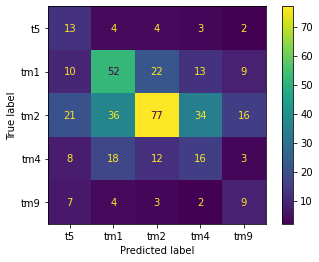

In [23]:
print(model.score(X_test, y_test)) 
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

Nearest Neighbors: score: 0.41959798994974873


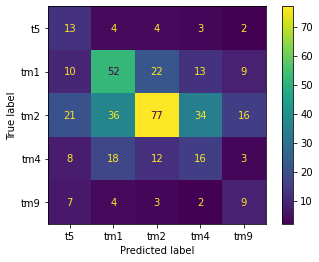

Linear SVM: score: 0.42462311557788945


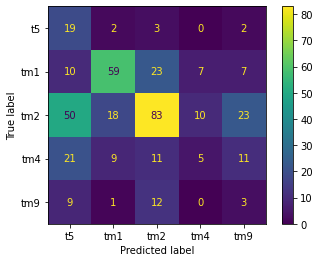

RBF SVM: score: 0.4547738693467337


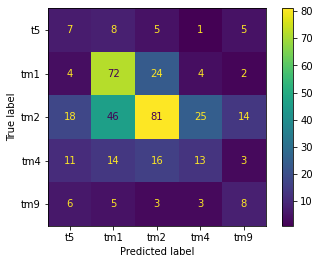

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpc.py:452: RuntimeWarning: overflow encountered in exp
  - np.log(np.diag(L)).sum()
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


KeyboardInterrupt: ignored

In [24]:
#try the sklearn loop over different models, haven't messed with plotting decision boundaries since we have so many dimensions

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1),
    MLPClassifier(alpha=.01, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train_resampled, y_train_resampled)
    score = clf.score(X_test, y_test)
    print(f'{name}: score: {score}')

    preds = clf.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.show()


# Old code to take frame-level predictions and use the most frequent prediction at the roi level

In [ ]:
# #add the classes and probabilities back to the df of test set records
# test_df = df.query('roi_ID in @X_test_rois')
# test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
# test_df['pred'] = preds

In [ ]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [ ]:
# max_preds.head()

In [ ]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [ ]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [ ]:
# #show the confusion matrix for the test set rois
# print(classification_report(max_preds['label'], max_preds['most_predicted_class']))
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])

In [ ]:
# #return the predicted classes and probabilities
# preds_prob = model.predict_proba(X_test)
# preds = model.predict(X_test)
# print(model.classes_)
# preds_prob

In [ ]:
# #add the classes and probabilities back to the df of test set records
# test_df = df.query('roi_ID in @X_test_rois')
# test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
# test_df['pred'] = preds

In [ ]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [ ]:
# max_preds.head()

In [ ]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [ ]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [ ]:
# #show the confusion matrix for the test set rois
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])